In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
%matplotlib inline


# Generadores de números pseudoaleatorios




## Generador de von Neumann


Secuencia de von Neumann (1946):

1. $X_0$: número de 4 dígitos.  <font color = red>($1234$) </font>
2.  $X_i^2$: escrito con 8 dígitos.  <font color = red>($01522756$)</font>
3.  $X_{i+1}$: 4 dígitos centrales. <font color = red>($5227$)</font>
4. Volver a 2.


In [2]:
##generador de von Neumann
def vonNeumann(u):
    'u debe ser un entero de hasta 4 cifras'
    u=((u**2)//100) %10000
    return u


In [3]:
##Generación de una secuencia con el generador de von Neumann
##n=longitud deseada de la secuencia
##semilla: número entero de hasta cuatro dígitos
n = 100
#1234#2345 #1122 # 3792  #2100  #9999
semilla = 9999
secuencia=[semilla]
for i in range(n):
    secuencia.append(vonNeumann(secuencia[i]))

print(secuencia)
#secuencia_en_0_1 = [secuencia[i]/10000 for i in range(n)]
#print(secuencia_en_0_1)


[9999, 9800, 400, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600, 3600, 9600, 1600, 5600]



## Generadores congruenciales


In [4]:
###Generador mixto
##M: período, a: multiplicador, c:incremento
def ranMixto(a, c, M, u):
    return (a * u + c) % M

In [5]:
###Generador multiplicativo
###M: período, a: multiplicador

def ranMulti(a, M, u):
    return (a * u) % M

Las siguientes celdas se utilizaron en la videoclase para generar secuencias e histogramas.

In [6]:
a = 3; c = 0; M = 7; y0 = 2
u = y0
rands = [u]
for _ in range(100):
    u = (a * u + c) % M
    rands.append(u)
print(rands[:18])

[2, 6, 4, 5, 1, 3, 2, 6, 4, 5, 1, 3, 2, 6, 4, 5, 1, 3]


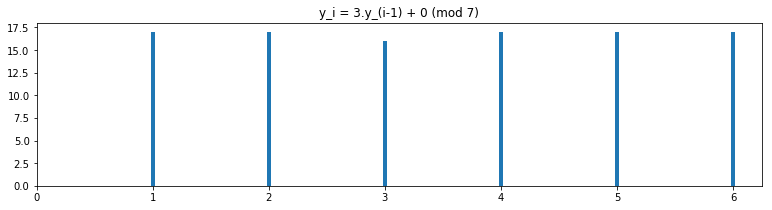

In [7]:
values, counts = np.unique(rands, return_counts=True)
plt.figure(figsize = (13,3))
plt.vlines(values, 0, counts, color='C0', lw=4);
plt.title('y_i = {}.y_(i-1) + {} (mod {})'.format(a,c,M))
plt.xticks([i for i in range(M)])
plt.ylim(0, max(counts) * 1.06);


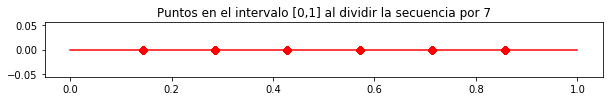

In [8]:
xs = np.linspace(0, 1, M+1)
ys = np.zeros(M+1)
plt.figure(figsize = (10,1))
plt.title('Puntos en el intervalo [0,1] al dividir la secuencia por {}'.format(M))
plt.plot(xs, ys, '-rD', markevery=rands)
plt.show()

__Ejemplo:__
La secuencia
$$0,1,6,15,12,13,2,11,8,9,\dots$$
fue generada por un generador congruencial lineal. ¿Cuál es el generador lineal, módulo 16, con el que se generó esta secuencia?



__Pregunta:__ Ahora, ¿cómo escoger $a$, $c$, $M$ y $y_0$ para obtener las secuencias con mayor período $K$ posible? 



__Teorema 1:__
Consideremos una secuencia dada por el generador:
$$y_{n+1}=a\,y_n+c \mod M, \qquad {c \neq 0}.$$
Entonces la secuencia tiene  período $M$ si y sólo si se cumplen todas las siguientes condiciones:
- El máximo común divisor entre $c$ y $M$ es 1: $(c,M)=1$.
- $a \equiv 1 \mod p$, para cualquier factor primo $p$ de $M$.
- Si $4$ divide a  $M$, entonces $a \equiv 1 \mod 4$.




In [9]:
##Elegir $M$, $a$ y $c$ para obtener un generador 
##congruencial lineal mixto que satisfaga el Teorema 1
M = 19
a = 5
c = 3
semilla = 0  #elegir cualquier semilla
####
u = semilla
n = 15 #longitud de la secuencia
for _ in range(n):
    print(u,end = '    ')
    u=ranMixto(a,c,M,u)

0    3    18    17    12    6    14    16    7    0    3    18    17    12    6    


Notemos en particular que, si $M=2^n$, entonces $a$ debe ser de la forma $4m+1$ y $c$ debe ser impar. Una ventaja de tomar $M$ igual a una potencia de $2$, digamos $2^n$, es que computacionalmente tomar módulo equivale a considerar los últimos $n$ bits de la representación.

__Ejemplo:__
En Numerical Recipes se presenta el siguiente ejemplo de un modelo de generador provisto por bibliotecas de ANSI C, y que responde a un tipo de generador lineal congruencial mixto. En este caso se toma:
$$a=1103515245, \qquad c=12345, \qquad M=2^{32}.$$
Así en este caso el período de la secuencia es $K=2^{32}=4\,294\,967\,296.$



In [10]:
a = 1103515245
c = 12345
M = 2**32
semilla = 9876543210

u = 3 
for _ in range(20):
    u = ranMixto(a,c,M,u)
    print(u / M)

0.7707993686199188
0.10845790640451014
0.1581629510037601
0.6268401963170618
0.8146734042093158
0.24103000503964722
0.06368041271343827
0.2371738243382424
0.8722054120153189
0.9304134214762598
0.7516659996472299
0.7588857018854469
0.24311877880245447
0.754294227110222
0.8316251267679036
0.5134420364629477
0.6607115678489208
0.6691388583276421
0.18645111797377467
0.1313567345496267


  
__Teorema 2:__ 
Para un generador multiplicativo $$y_{n+1}=a\,y_n \mod M,$$
el período $K$ de la secuencia verifica las siguientes tres propiedades:
- Si $K=M-1$ entonces $M$ es primo.
- Si $M$ es primo, entonces $K$ divide a $M-1$.
- $K=M-1$ si y sólo si $a$ es raíz primitiva de $M$ y $M$ es primo.


In [11]:
##Elegir M primo y a raíz primitiva de M
semilla = 10
M = 11
a = 8

u = semilla
secuencia = [semilla]
for _ in range(2 * M):
    secuencia.append(ranMulti(a,M,u))
    u=ranMulti(a,M,u)
#    print(u, end = '    ')
print(secuencia)

[10, 3, 2, 5, 7, 1, 8, 9, 6, 4, 10, 3, 2, 5, 7, 1, 8, 9, 6, 4, 10, 3, 2]



__Ejemplo: __ En Numerical Recipes se menciona el generador congruencial multiplicativo con 

$$ a=7^5=16807 \qquad \qquad M=2^{31}-1=2\,147\,483\,647.$$

En este caso, $M$ es un __primo de Mersenne__, es decir, de la forma $2^k-1$. La factorización en primos de $M-1$ está dada por:

$$M-1 = 2^{31}-2 = 2 \cdot 3^2 \cdot {\bf 7} \cdot 11 \cdot 31 \cdot 151 \cdot 331.$$

Dado que $7$ es raíz primitiva de $M$ y $(5, M-1)=1$, entonces  $7^5=16807$ es raíz primitiva, y la secuencia generada tiene período:

$$K=M-1=2\,147\,483\,646.$$



In [12]:
##generador con M primo de Mersenne
M = 2**31-1
a = 7**5

n = 5 ##longitud de secuencia
semilla = 987654321

u = semilla
for _ in range(n):
    print(u / M)
    u=ranMulti(a, M, u)


0.45991238274607454
0.7474168132745739
0.8343807057637631
0.4365217715671853
0.6214147296833874


## Hiperplanos paralelos

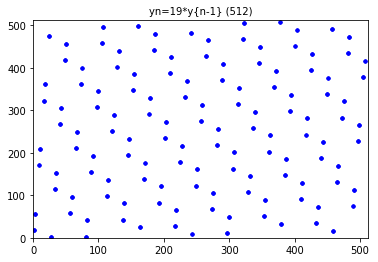

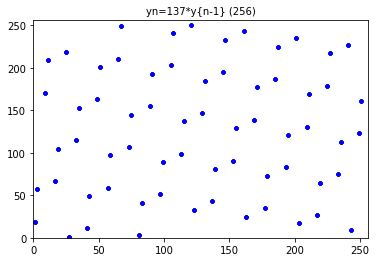

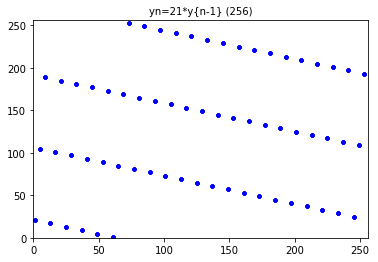

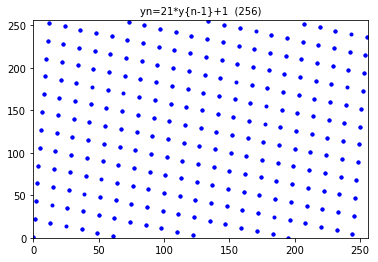

In [13]:
###Hiperplanos
N = 500  ##cantidad de puntos
semilla = 987654321
secuencia = []


###primer grafico


a=19
M=512

secuencia=[]
u=semilla
for _ in range(N+1):
    secuencia.append(u)
    u=ranMulti(a,M,u)


plt.figure(1)
plt.title('yn=19*y{n-1} (512)',fontsize=10)
plt.axis([0,M,0,M])
plt.plot(secuencia[0:N],secuencia[1:N+1],'b.')

###segundo grafico


a=19
M=256

secuencia=[]
u=semilla
for i in range(N+1):
    secuencia.append(u)
    u=ranMulti(a,M,u)

plt.figure(2)
plt.title('yn=137*y{n-1} (256)',fontsize=10)    
plt.axis([0,M,0,M])
plt.plot(secuencia[0:N],secuencia[1:N+1],'b.')

###tercer grafico


a=21
M=256
c=0
secuencia=[]
u=semilla
for i in range(N+1):
    secuencia.append(u)
    u=ranMulti(a,M,u)

plt.figure(3)
plt.title('yn=21*y{n-1} (256)',fontsize=10)
plt.axis([0,M,0,M])
plt.plot(secuencia[0:N],secuencia[1:N+1],'b.')

###cuarto grafico


a=21
M=256
c=1
secuencia=[]
u=semilla
for i in range(N+1):
    secuencia.append(u)
    u=ranMixto(a,c,M,u)

plt.figure(4)
plt.title('yn=21*y{n-1}+1  (256)',fontsize=10)
plt.axis([0,M,0,M])
plt.plot(secuencia[0:N],secuencia[1:N+1],'b.')

plt.show()


Un mal generador y ejemplo de este problema es __RANDU__. Este es un generador del tipo congruencial lineal multiplicativo ($c=0$), con $M=2^{31}$ y $a=2^{16}+3$:

$$y_n=65539\cdot y_{n-1} \mod 2\,147\,483\,648.$$

Las ternas generadas por RANDU se ubican en 15 planos paralelos, dentro del cubo de lado 1. Cabe mencionar que este generador fue implementado en computadoras de IBM por mucho tiempo, y difundido a otros sistemas.


In [14]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

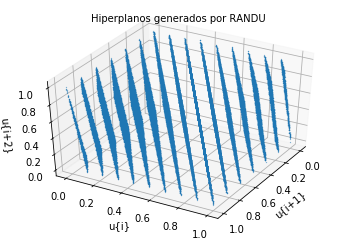

In [15]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
fig.gca(projection='3d')

N=100000
secuencia=np.empty(N+2,float)

M=2**31
a=2**16+3
semilla=1

u = semilla
for i in range(N+2):
    u = ranMulti(a,M,u)
    secuencia[i]=u/M

ax.scatter(secuencia[1:N+1],secuencia[0:N],secuencia[2:N+2], depthshade=False, s=0.2, marker='.')

plt.figure(1)
ax.set_xlabel('u{i+1}')
ax.set_ylabel('u{i}')
ax.set_zlabel('u{i+2}')
ax.view_init(azim=30, elev=40) ##probar modificar los ángulos de azimut y elevación

plt.title("Hiperplanos generados por RANDU", fontsize=10)
plt.show()


## Generadores congruenciales lineales combinados



Un generador de estas características es el propuesto en \cite{lecuyer}. Se consideran los generadores:
$$x_n=40014x_{n-1} \mod 2^{31}-85$$
$$y_n=40692y_{n-1} \mod 2^{31}-249$$
Los períodos de estos generadores tienen un solo 2 como factor común:
$$2^{31}-86=2\cdot 3\cdot 7\cdot 631\cdot 81031, \qquad 2^{31}-250=2\cdot 19\cdot 31\cdot 1019\cdot 1789,$$
por lo que el período de la secuencia $(x_n-y_n) \mod M$ (para cualquiera de los módulos $M$) es del orden del producto de los dos períodos dividido $2$. En este caso,
$$ K \approx 2^{61}=2\,305\,843\,009\,213\,693\,952 \sim 2.3\times 10^{18}.$$

Los siguientes códigos muestran la distribución de los puntos $(U_i,U_{i+1})$ para cada uno de los tres generadores, pero tomando sólo aquellos donde $U_i<0.001$.

In [16]:

u1 = 3
u2 = 3
lista1 = [u1]
lista2 = [u2]
for _ in range(42):
    print(u1, end=',\ ')
    u1 = ranMixto(4,1,9,u1)
    lista1.append(u1)
print()
for _ in range(42):
    print(u2, end=',\ ')
    u2 = ranMixto(5,3,13,u2)
    lista2.append(u2)
print()
cuantos = np.zeros(9)
for j in range(36):
    cuantos[(lista1[j] + lista2[j])%9] += 1
    print((lista1[j] + lista2[j])%9, end=',\ ')
print(cuantos)

3,\ 4,\ 8,\ 6,\ 7,\ 2,\ 0,\ 1,\ 5,\ 3,\ 4,\ 8,\ 6,\ 7,\ 2,\ 0,\ 1,\ 5,\ 3,\ 4,\ 8,\ 6,\ 7,\ 2,\ 0,\ 1,\ 5,\ 3,\ 4,\ 8,\ 6,\ 7,\ 2,\ 0,\ 1,\ 5,\ 3,\ 4,\ 8,\ 6,\ 7,\ 2,\ 
3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 2,\ 0,\ 3,\ 5,\ 
6,\ 0,\ 1,\ 6,\ 1,\ 7,\ 2,\ 1,\ 8,\ 8,\ 6,\ 8,\ 0,\ 3,\ 4,\ 0,\ 4,\ 1,\ 5,\ 4,\ 2,\ 2,\ 0,\ 2,\ 3,\ 6,\ 7,\ 3,\ 7,\ 4,\ 8,\ 7,\ 5,\ 5,\ 3,\ 5,\ [4. 4. 4. 4. 4. 4. 4. 4. 4.]


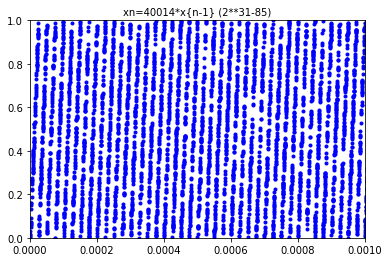

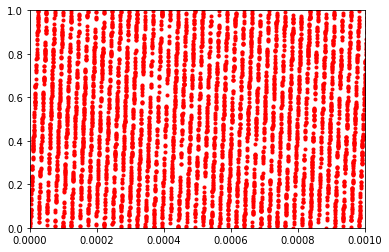

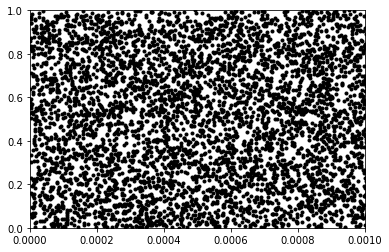

In [17]:
M1 = 2**31-85
a1 = 40014
def ran0(u):  
    'Generador ran0'
    return (a1*u) % M1
    

M2 = 2**31-249
a2 = 40692
def ran1(u):
    'Generador ran1'
    return (a2*u)%M2
    

def ranCombinado(u1,u2):
    'Generador que se obtiene combinando ran0 y ran1 módulo M1 o M2'
    return (u1-u2) % M

N = 5000000
sec1, sec2, sec3 = np.empty(N+1,float), np.empty(N+1,float), np.empty(N+1,float)

M = M1  #se puede elegir M2 también.
semilla1 = 1000
semilla2 = 1000

u1 = semilla1
u2 = semilla2

for i in range(N):
    u1 = ran0(u1)
    u2 = ran1(u2)
    u3 = ranCombinado(u1,u2)
    sec1[i] = u1 / M1
    sec2[i] = u2 / M2
    sec3[i] = u3 / M    
 
plt.figure()
plt.axis([0, 0.001, 0, 1])
plt.title('xn=40014*x{n-1} (2**31-85)',fontsize=10)
plt.plot(sec1[0:N],sec1[1:N+1],'b.')


plt.figure() 
plt.axis([0, 0.001, 0, 1])
#plt.title('yn=40692*y{n-1}  (2**31-249)',fontsize=10)
plt.plot(sec2[0:N],sec2[1:N+1],'r.')




plt.figure() 
plt.axis([0, 0.001, 0, 1])
#plt.title('xn-yn  (2**31-85)',fontsize=10)
plt.plot(sec3[0:N],sec3[1:N+1],'k.')

plt.show()


## Otros generadores eficientes y portables

Existen otras formas de mejorar la eficiencia de los generadores construidos a partir de un generador congruencial, como son del tipo Fibonacci, resta con préstamo, suma con acarreo, y otros tantos. En el artículo de Marsaglia y Zaman (ver Referencias) se presenta una extensa lista de generadores candidatos a ser combinados para obtener aún mejores generadores. Algunos son los siguientes:


  - M=$2^{32}$,     $x_n=69069\,x_{n-1}+$ impar,    Período $K=2^{32}$
  - M=$2^{32}$,     $x_n=x_{n-1}*x_{n-2}$,          Período $K=2^{31}$
  - M=$2^{32}$,     $x_n=x_{n-1}+x_{n-2}+C$,        Período $K=2^{58}$ 
  - M=$2^{31}-69$,  $x_n=x_{n-3}-x_{n-1}$,          Período $K=2^{62}$
  - M=$2^{32}-18$,  $x_n=x_{n-2}-x_{n-3}-C$,        Período $K=2^{95}$
 

La constante $C$ indica un $0$ o un $1$ según corresponda, para acarreos o préstamos.

## Mersenne Twister

Por último, señalamos que en la biblioteca Python se implementa la rutina __Mersenne-twister__, bastante más compleja que los generadores que hemos visto. Invitamos al lector a investigar sobre este generador en particular.

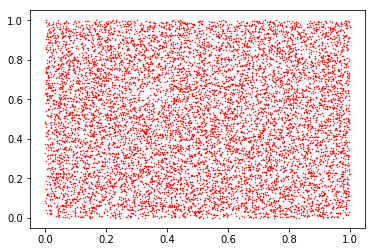

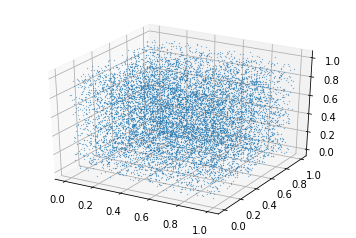

In [18]:
N=10000
sec = np.empty(N+2,float)
for i in range(N+2):
    sec[i] = random()

plt.figure(1)
plt.plot(sec[0 : N+1], sec[1 : N+2], 'r.', markersize = 1)

fg = plt.figure(2)
bx = fg.add_subplot(111, projection = '3d')
bx.scatter(sec[1 : N+1],sec[0 : N],sec[2 : N+2], depthshade = False, s = 0.2, marker='.')
plt.show()

## Referencias

1. L'Ecuyer, Pierre. _Efficient and Portable Combined Random Number Generators_, Communications of the ACM, (1988) __31__(6), pp.742--774.
2. Bustos, Oscar y Frery, Alejandro. _Simulacao estocastica : teoría e algoritmos (versao completa)_. Series Monografías en Matemática. __Vol 42__. Edit. IMPA. 1992.
3. Knuth, Donald E. _Seminumerical Algorithms. The Art of Computer Programming._ __Vol 2__. Edit. Addison-Wesley. 1998.
4. Marsaglia, George y Zaman, Arif. _Some portable very-long-period random number generators_, Computers in Physics, __8__ (6). (1994)
5. _Numerical recipes in C: The Art of Scientific Computing_. Cambridge University Press. (1988-1992)